In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os

MOUNT = True

if MOUNT:
  drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# FILEPATH = "/content/gdrive/MyDrive/HackYeah 2023 - dane/ML/raw"
FILEPATH = "/content/gdrive/MyDrive/Shared with me/HackYeah 2023 - dane/ML/raw"



In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px
import numpy


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(FILEPATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv(f"{FILEPATH}/parsed.csv")
unscaled_df = pd.read_csv(f"{FILEPATH}/states_all.csv")
orig_df = df

FileNotFoundError: ignored

In [6]:
from sklearn.ensemble import IsolationForest
import shap

iforest = IsolationForest(max_samples='auto',bootstrap=False, n_jobs=-1, random_state=42)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'YEAR' and 'STATE' from the list
cols_to_exclude = ["YEAR", "STATE"]
final_cols = [col for col in numeric_cols if col not in cols_to_exclude]

filtered_df = df[final_cols]

iforest_= iforest.fit(filtered_df)

y_pred = iforest_.predict(filtered_df)

y_score = iforest.decision_function(filtered_df)
neg_value_indices = np.where(y_score<0)

exp = shap.TreeExplainer(iforest) #Explainer
shap_values = exp.shap_values(filtered_df)  #Calculate SHAP values
shap.initjs()
shap.summary_plot(shap_values, filtered_df)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


NameError: ignored

In [ ]:
type(shap.getjs(shap_values, filtered_df))

In [ ]:
shap.summary_plot(shap_values, filtered_df, plot_type="bar")

In [ ]:
neg_value_indices

(array([   0,    4,    8,   24,   32,   43,   55,   94,  106,  145,  157,
         196,  208,  259,  310,  314,  315,  338,  349,  361,  389,  400,
         412,  416,  440,  451,  463,  467,  491,  502,  514,  518,  521,
         542,  553,  565,  569,  570,  572,  574,  593,  604,  616,  644,
         655,  667,  671,  672,  674,  685,  693,  695,  706,  718,  725,
         746,  757,  769,  773,  774,  776,  786,  787,  795,  797,  808,
         810,  820,  825,  846,  848,  859,  871,  873,  875,  876,  878,
         881,  888,  890,  897,  899,  905,  910,  912,  922,  926,  932,
         948,  950,  951,  961,  973,  975,  977,  982,  990,  999, 1001,
        1007, 1012, 1014, 1024, 1028, 1033, 1050, 1052, 1063, 1072, 1075,
        1077, 1079, 1084, 1091, 1092, 1100, 1101, 1103, 1109, 1114, 1116,
        1126, 1128, 1130, 1152, 1154, 1160, 1165, 1167, 1174, 1177, 1179,
        1181, 1186, 1193, 1194, 1195, 1202, 1203, 1205, 1207, 1208, 1211,
        1216, 1218, 1223, 1228, 1230, 

In [ ]:
OUTLIER_INDEX = 8     # replace with your index, e.g., 123

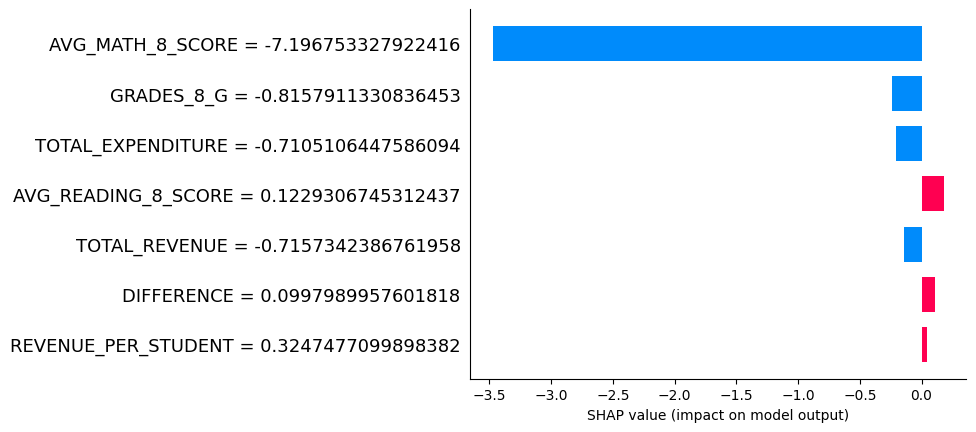

In [ ]:
shap.bar_plot(shap_values[OUTLIER_INDEX],features =filtered_df.iloc[OUTLIER_INDEX,:] ,feature_names =filtered_df.columns )


In [ ]:
shap.initjs()
shap.force_plot(exp.expected_value, shap_values[OUTLIER_INDEX],features =filtered_df.iloc[OUTLIER_INDEX,:] ,feature_names =filtered_df.columns)


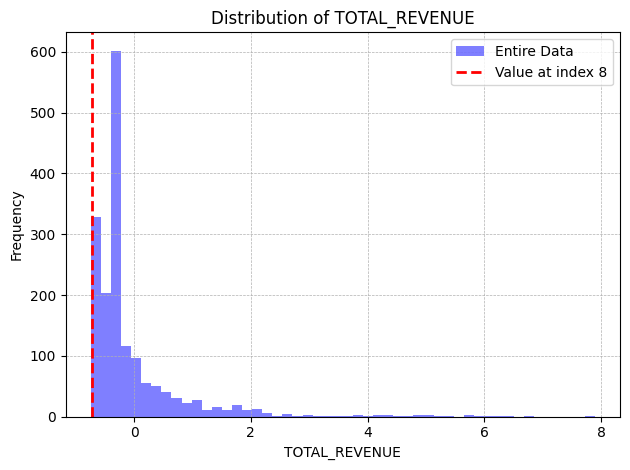

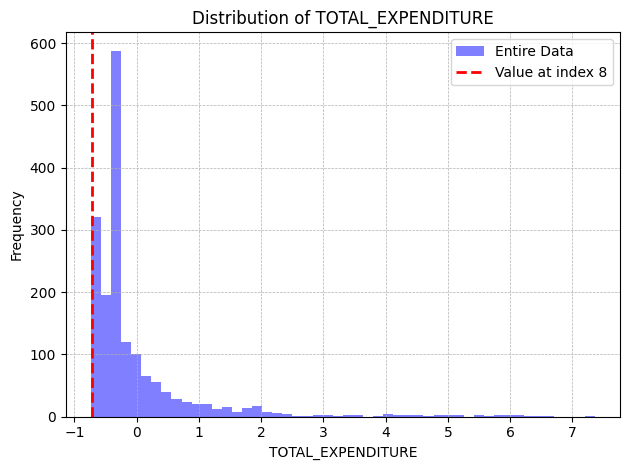

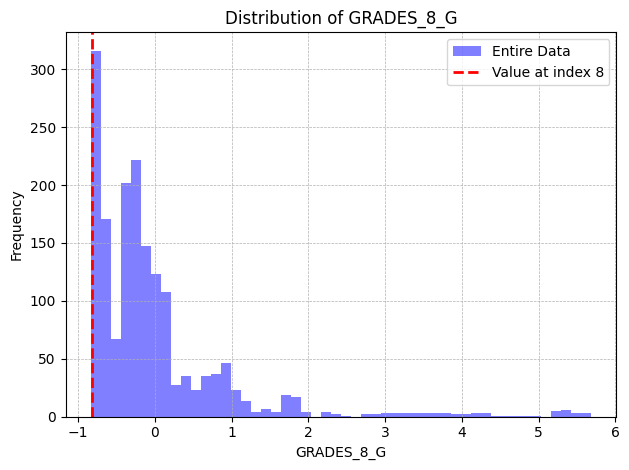

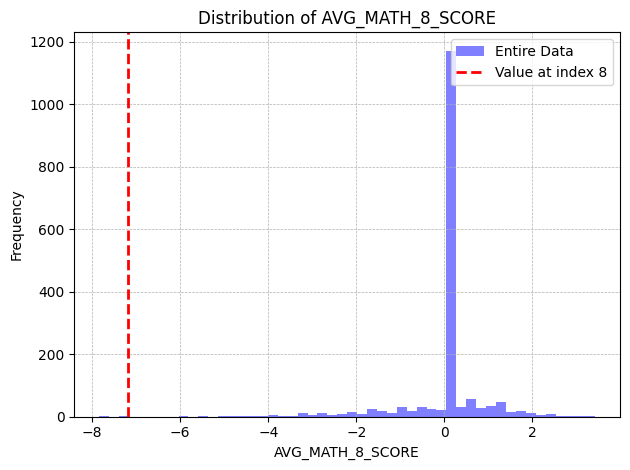

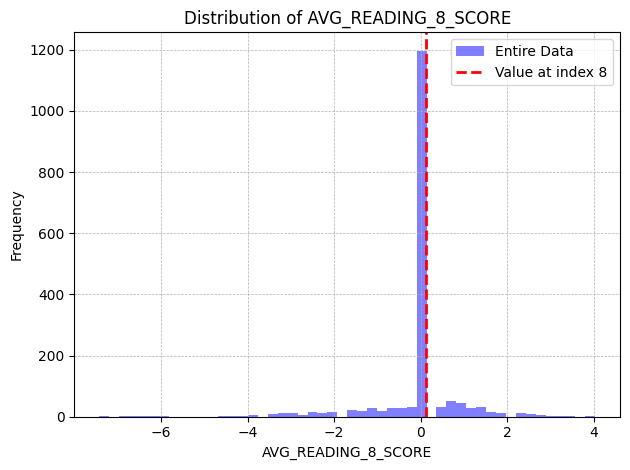

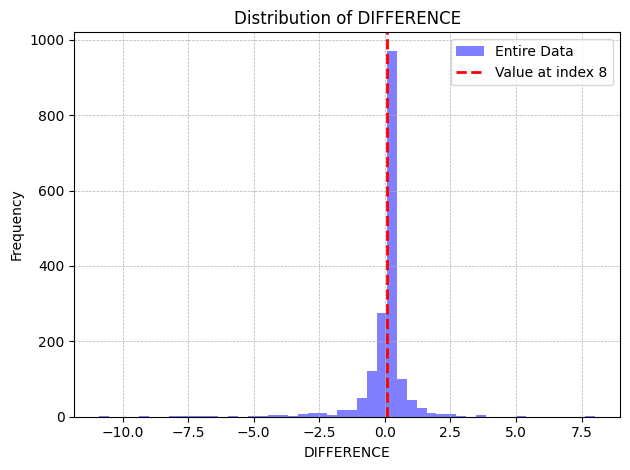

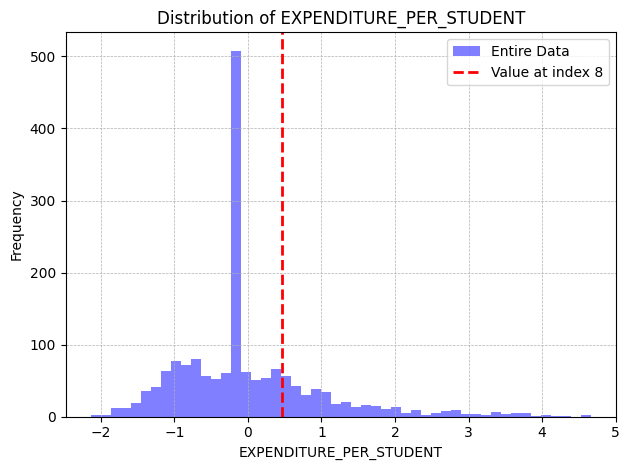

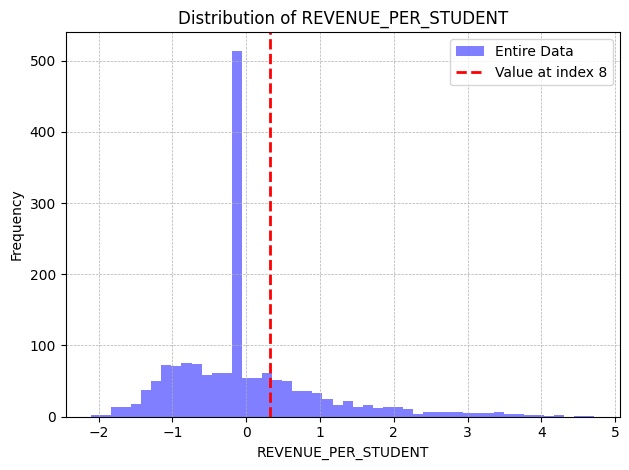

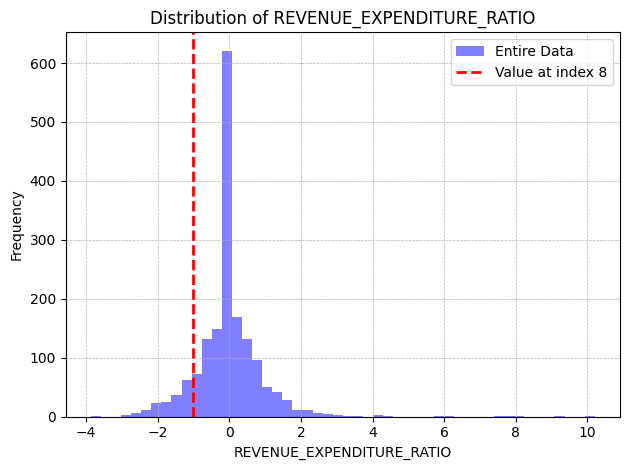

In [ ]:
import matplotlib.pyplot as plt

for feature in filtered_df.columns:

  # FEATURE = 'GRADES_8_G'  # replace with your feature name, e.g., 'TOTAL_REVENUE'

  # Plot histogram for the entire dataset
  plt.hist(df[feature], bins=50, alpha=0.5, label='Entire Data', color='blue')

  # Highlight the value of the outlier
  outlier_value = df.loc[OUTLIER_INDEX, feature]
  plt.axvline(outlier_value, color='red', linestyle='dashed', linewidth=2, label=f'Value at index {OUTLIER_INDEX}')

  plt.legend(loc='upper right')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.tight_layout()
  plt.show()


In [ ]:
unscaled_df.iloc[OUTLIER_INDEX]

PRIMARY_KEY                     1992_DISTRICT_OF_COLUMBIA
STATE                                DISTRICT_OF_COLUMBIA
YEAR                                                 1992
ENROLL                                                NaN
TOTAL_REVENUE                                    709480.0
FEDERAL_REVENUE                                   64749.0
STATE_REVENUE                                         0.0
LOCAL_REVENUE                                    644731.0
TOTAL_EXPENDITURE                                742893.0
INSTRUCTION_EXPENDITURE                          329160.0
SUPPORT_SERVICES_EXPENDITURE                     316679.0
OTHER_EXPENDITURE                                     NaN
CAPITAL_OUTLAY_EXPENDITURE                        47272.0
GRADES_PK_G                                        4818.0
GRADES_KG_G                                        6667.0
GRADES_4_G                                         5832.0
GRADES_8_G                                         5000.0
GRADES_12_G   